# 1º passo Gerar os dataset's 

• number of instances (rows in your dataset table) 

• number of classes (for multi-class classification problems) 

• proportion of classes (balanced and imbalanced class problem) 

• distribution of points within each class (shape of point clouds) 

• shape of the border between the class regions, from linear to whatever 

• level of noise

• level of overlap between the classes


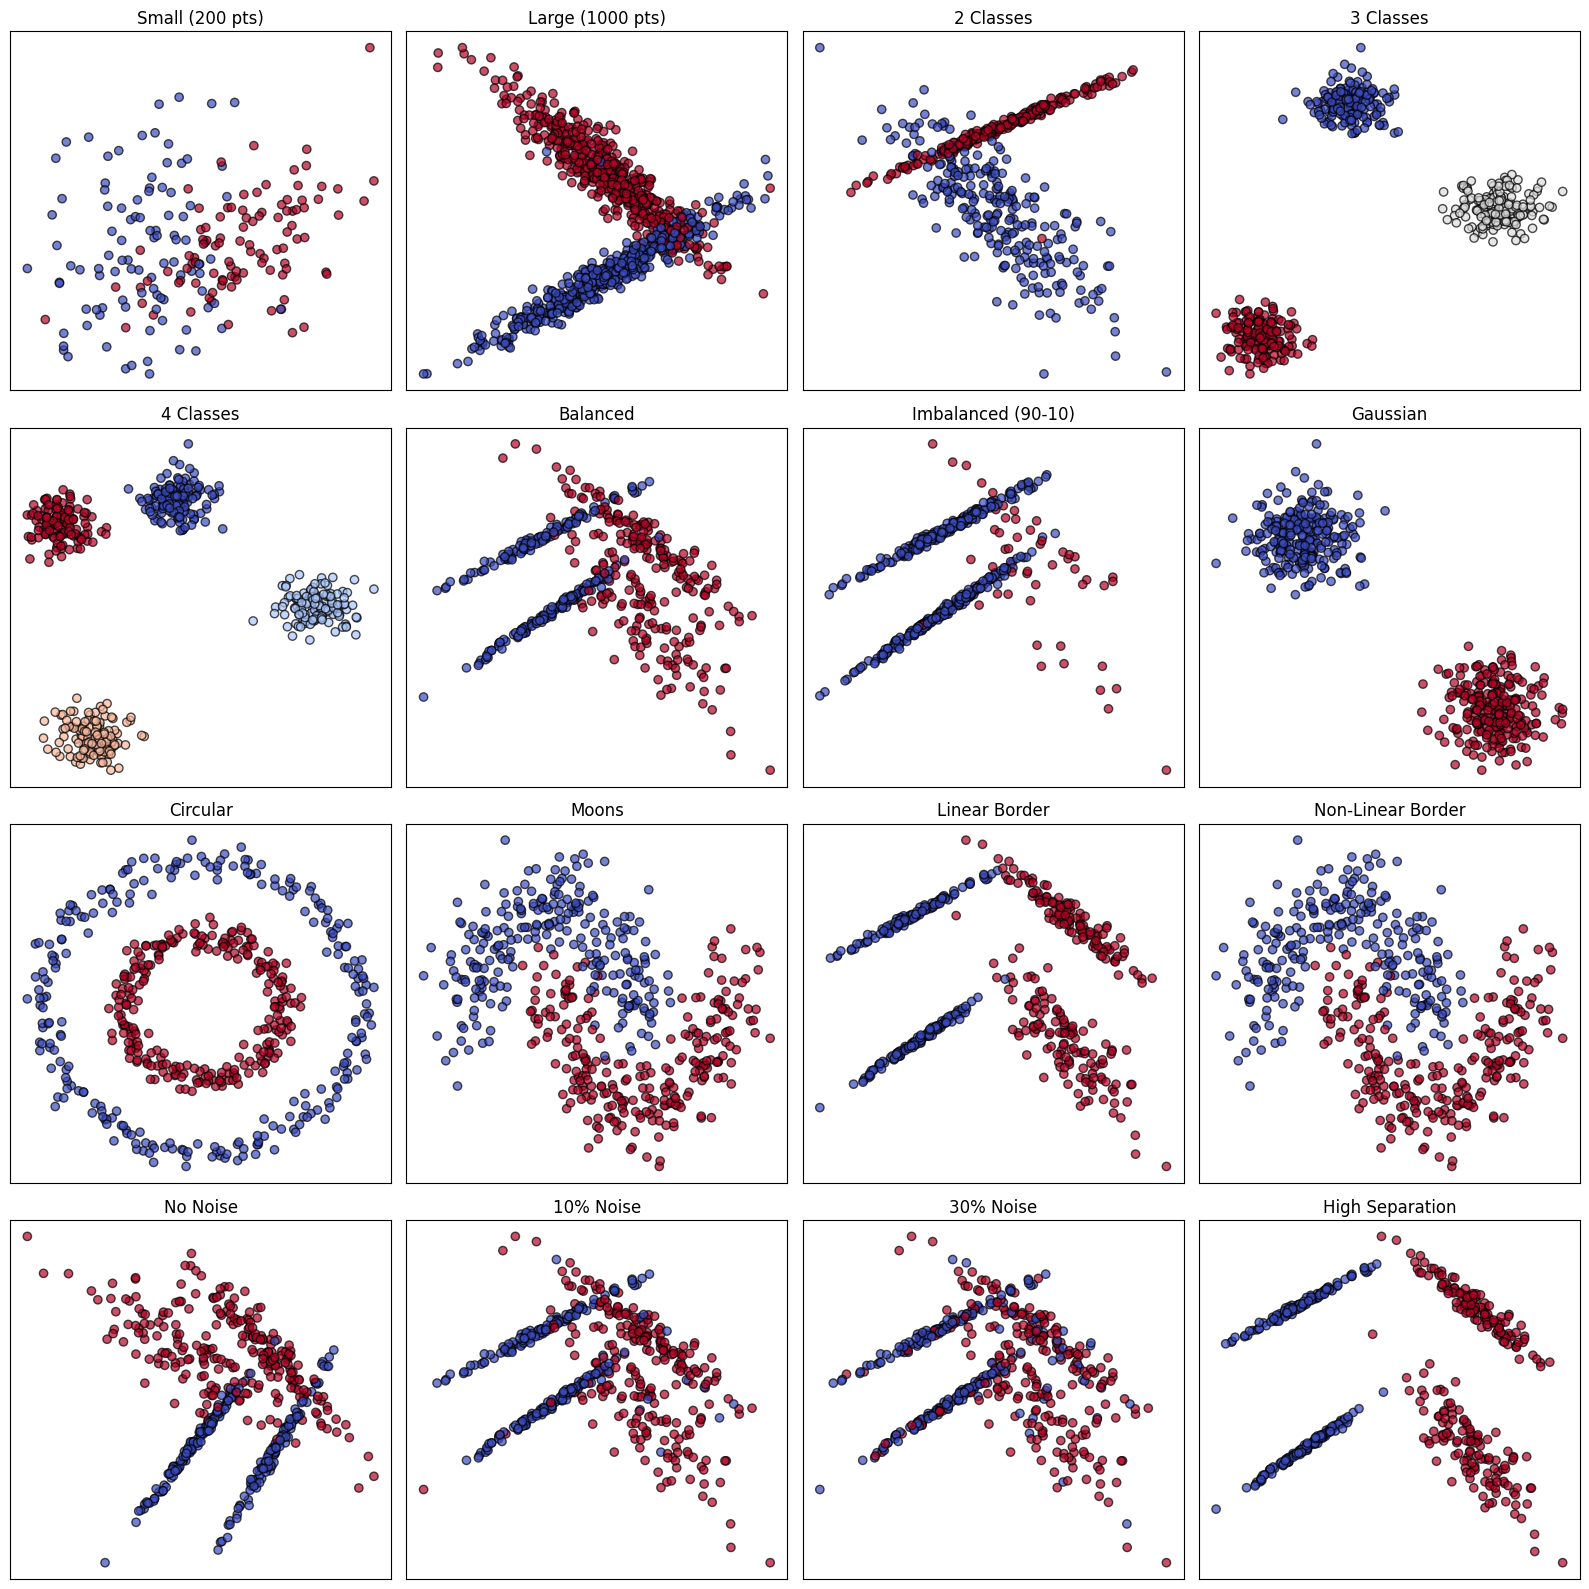

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split

# Fixar seed para reprodutibilidade
np.random.seed(42)

# Lista de datasets
datasets = {}

# 1️⃣ Número de instâncias (pequeno e grande)
datasets["Small (200 pts)"] = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
datasets["Large (1000 pts)"] = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2️⃣ Número de classes (2, 3 e 4)
datasets["2 Classes"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
datasets["3 Classes"] = make_blobs(n_samples=500, centers=3, n_features=2, random_state=42)
datasets["4 Classes"] = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)

# 3️⃣ Proporção de classes (Balanceado e Desbalanceado)
datasets["Balanced"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.5, 0.5], random_state=42)
datasets["Imbalanced (90-10)"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.9, 0.1], random_state=42)

# 4️⃣ Distribuição dos pontos (Gaussian, Circular, Moons)
datasets["Gaussian"] = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
datasets["Circular"] = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
datasets["Moons"] = make_moons(n_samples=500, noise=0.2, random_state=42)

# 5️⃣ Forma da fronteira (Linear vs. Não Linear)
datasets["Linear Border"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=2.0, random_state=42)
datasets["Non-Linear Border"] = make_moons(n_samples=500, noise=0.2, random_state=42)

# 6️⃣ Nível de Ruído (0, 10%, 30%)
datasets["No Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.0, random_state=42)
datasets["10% Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.1, random_state=42)
datasets["30% Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.3, random_state=42)

# 7️⃣ Sobreposição entre classes (Separação alta vs. baixa)
datasets["High Separation"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=2.5, random_state=42)
datasets["Low Separation"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=0.5, random_state=42)

# 📊 Visualizar os datasets
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for ax, (name, (X, y)) in zip(axes.flatten(), datasets.items()):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k', alpha=0.7)
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Separar datasets em treino e teste
datasets_train_test = {name: train_test_split(X, y, test_size=0.3, random_state=42) for name, (X, y) in datasets.items()}

%store datasets_train_test
 